In [1]:
# import sys
# !{sys.executable} -m pip install matplotlib
# 如果下一行無法執行，先執行上面兩行指令
%matplotlib inline

In [20]:
# !pip install --upgrade --no-cache-dir git+https://github.com/rongardF/tvdatafeed.git
# !pip install websocket-client

In [2]:
from tvDatafeed import TvDatafeed,Interval

In [3]:
# get credentials for tradingview
username = ''
password = ''

In [4]:
# initialize tradingview

# tv = TvDatafeed(username=username,password=password)
tv = TvDatafeed()

error while signin
you are using nologin method, data you access may be limited


In [12]:
# tv.get_hist('AAPL','NASDAQ',)
# TAIFEX:TXF1!
from datetime import datetime


index_data=tv.get_hist('TXF1!','TAIFEX',interval=Interval.in_1_minute,n_bars=120)
index_data.info()

# index_data.to_csv('txf1.csv')

# 獲取當前的年月日時分秒
now = datetime.now()
file_name = f'txf1_{now.strftime("%Y-%m-%d_%H-%M-%S")}.csv'
index_data.to_csv(file_name)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2024-08-20 22:23:00 to 2024-08-21 00:23:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  120 non-null    object 
 1   open    120 non-null    float64
 2   high    120 non-null    float64
 3   low     120 non-null    float64
 4   close   120 non-null    float64
 5   volume  120 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.6+ KB


In [6]:
# nifty_data=tv.get_hist('NIFTY','NSE',interval=Interval.in_1_hour,n_bars=1000)

# TAIFEX:TXF1!
txf1_data=tv.get_hist('TXF1!','TAIFEX',interval=Interval.in_15_minute,n_bars=1000)

In [7]:
# nifty_data.info()
txf1_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2024-08-01 20:30:00 to 2024-08-20 23:15:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1000 non-null   object 
 1   open    1000 non-null   float64
 2   high    1000 non-null   float64
 3   low     1000 non-null   float64
 4   close   1000 non-null   float64
 5   volume  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


<Axes: >

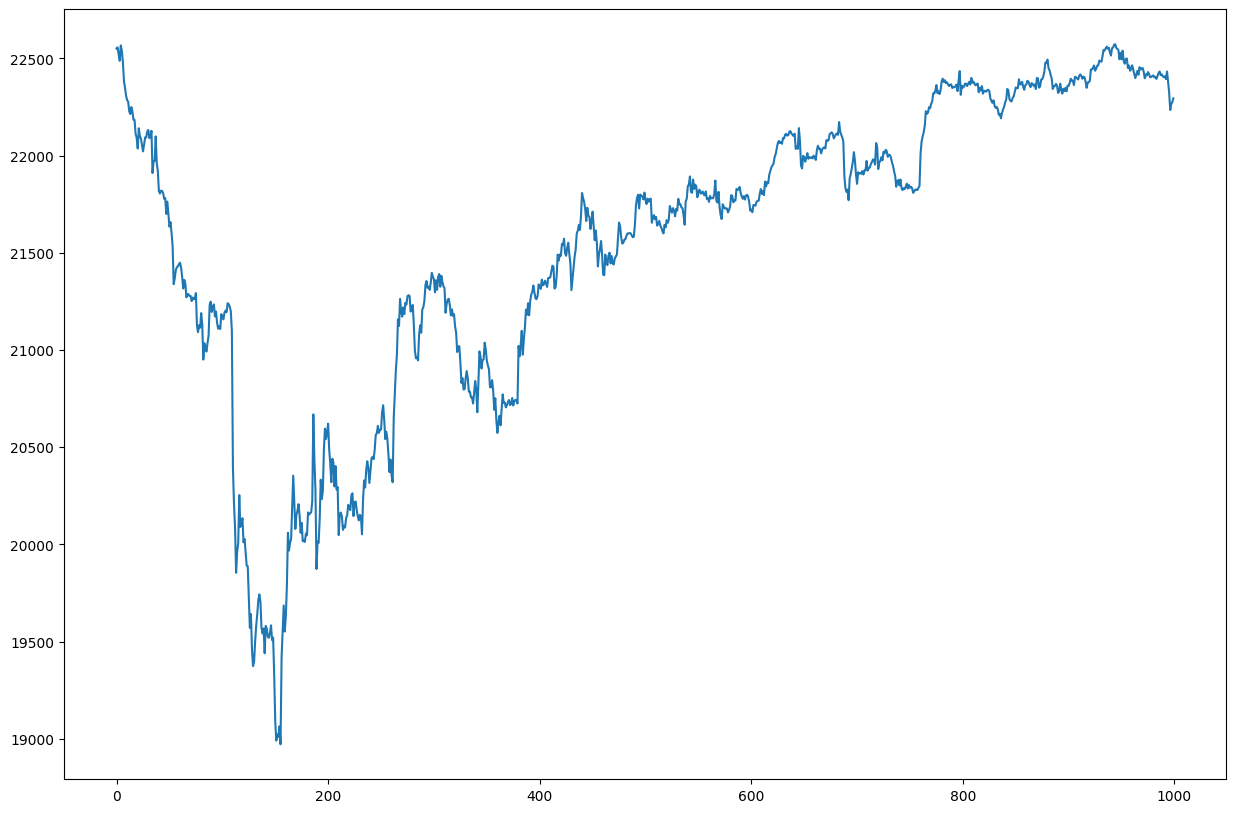

In [8]:
# nifty_data.close.plot(figsize=(15,10),use_index=False)
txf1_data.close.plot(figsize=(15,10),use_index=False)

In [10]:
# futures data
crudeoil_data=tv.get_hist('CRUDEOIL','MCX',Interval.in_2_hour,n_bars=5000,fut_contract=1)

ERROR:tvDatafeed.main:The read operation timed out
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


In [11]:
crudeoil_data.close.plot(figsize=(15,10))

AttributeError: 'NoneType' object has no attribute 'close'

In [12]:
# cryptocurrencies
btc_data=tv.get_hist('BTC','CME',Interval.in_1_minute,n_bars=5000,fut_contract=1)

In [13]:
btc_usd_data=tv.get_hist('BTCUSD','BINANCE',Interval.in_1_hour,n_bars=5000)

<Axes: xlabel='datetime'>

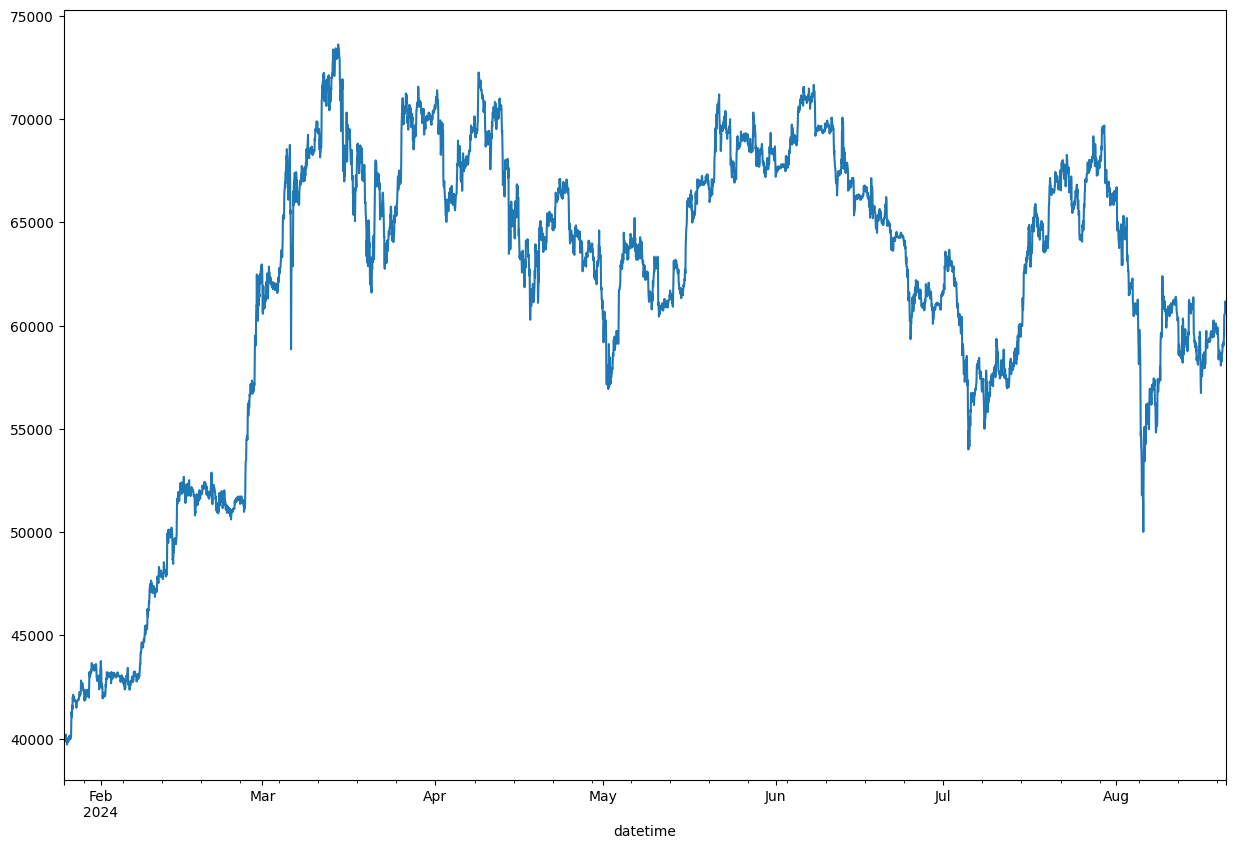

In [14]:
btc_usd_data.close.plot(figsize=(15,10))

In [16]:
etheur_data=tv.get_hist('ETHEUR','BINANCE',Interval.in_1_minute,5000)

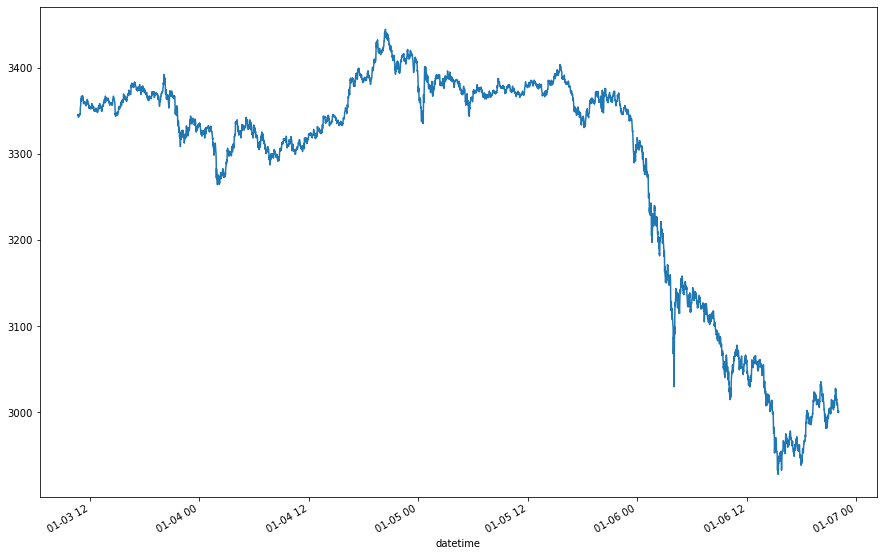

In [17]:
etheur_data.close.plot(figsize=(15,10))

In [18]:
# plotting candlesticks chart

import mplfinance as mpf

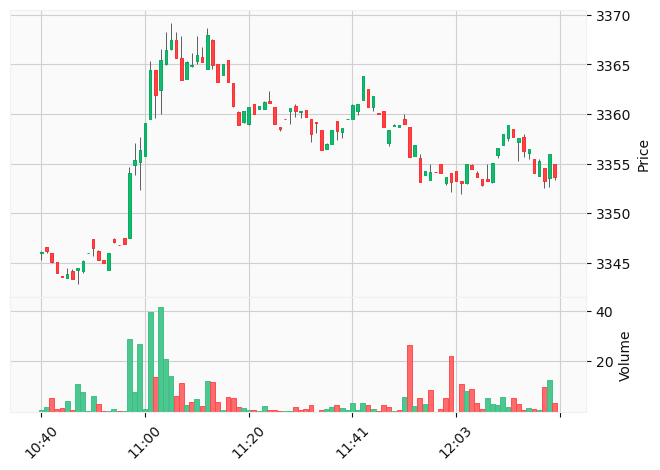

In [19]:
mpf.plot(etheur_data.head(100),type='candle',style='yahoo',volume=True)

In [20]:
etheur_data.to_csv('etheur.csv')

In [9]:
tv.search_symbol('WTI')

[{'symbol': 'WTI',
  'description': 'West Texas Intermediate Crude Oil cash',
  'type': 'cfd',
  'exchange': 'BLACKBULL',
  'currency_code': 'USD',
  'logoid': 'crude-oil',
  'provider_id': 'blackbullmarkets'},
 {'symbol': 'WTI',
  'description': 'OIL FUTURES',
  'type': 'futures',
  'exchange': 'MATBAROFEX',
  'currency_code': 'USD',
  'logoid': 'crude-oil',
  'provider_id': 'ice',
  'country': 'AR',
  'contracts': [{'symbol': 'WTI1!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: CURRENT CONTRACT IN FRONT'},
   {'symbol': 'WTI2!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: NEXT CONTRACT IN FRONT'},
   {'symbol': 'WTIU2022', 'description': 'SEP 2022'},
   {'symbol': 'WTIX2022', 'description': 'NOV 2022'},
   {'symbol': 'WTIF2023', 'description': 'JAN 2023'}]},
 {'symbol': 'WTI',
  'description': 'W&T Offshore, Inc.',
  'type': 'stock',
  'exchange': 'NYSE',
  'currency_code': 'USD',
  'logoid': 'w-and-t-offshore',
  'p